In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Which factors influence the satisfaction scores

### Step 1) Turn the dependent variable 'satisfaction' into a categorical variable

In [6]:
import pandas as pd

data_path = './data/satisfaction.csv'

satisfaction_df = pd.read_csv(data_path, index_col=0 )
satisfaction_df

,station,Avg Satisfaction
0,COURCELLES-MOTTE,3.63
1,ROUX,13.58
2,RONET-FORMATION,55.84
3,SCHAARBEEK-D.O.P.,NaN
4,CHATELET-FORMATION,62.61
...,...,...
617,VIELSALM,51.74
618,GOUVY,67.90
619,SCHAARBEEK-PERRON VORMING,53.30
620,SCHAARBEEK-GROEP R,NaN


In [29]:
satisfaction_df['station'].unique().shape

(622,)

In [ ]:
satisfaction_df.isna().sum()

station               0
Avg Satisfaction      0
Satisfaction Class    0
dtype: int64

### Er zijn effectief 622 verschillende stations in de data, die kunnen we nu classificeren

In [11]:
min = satisfaction_df['Avg Satisfaction'].min()
max = satisfaction_df['Avg Satisfaction'].max()

print('min:', min)
print('max:', max)

min: 2.03
max: 100.0


### Satisfaction score ranges between 0-100, we split up the data in five different classes: [0,20], [21,40], [41,60], [61,80], [81,100], we assign them respectively to classes 1, 2, 3, 4, 5. 

    1: really bad
    2: bad
    3: averge
    4: good
    5: really good

In [18]:
for station in satisfaction_df.index:
    if satisfaction_df.loc[station, 'Avg Satisfaction'] <= 20:
        satisfaction_df.loc[station, 'Satisfaction Class'] = 1
    elif satisfaction_df.loc[station, 'Avg Satisfaction'] <= 40:
        satisfaction_df.loc[station, 'Satisfaction Class'] = 2
    elif satisfaction_df.loc[station, 'Avg Satisfaction'] <= 60:
        satisfaction_df.loc[station, 'Satisfaction Class'] = 3
    elif satisfaction_df.loc[station, 'Avg Satisfaction'] <= 80:
        satisfaction_df.loc[station, 'Satisfaction Class'] = 4
    else:
        satisfaction_df.loc[station, 'Satisfaction Class'] = 5

satisfaction_df['Satisfaction Class'] = satisfaction_df['Satisfaction Class'].astype(int)

satisfaction_df


,station,Avg Satisfaction,Satisfaction Class
0,COURCELLES-MOTTE,3.63,1
1,ROUX,13.58,1
2,RONET-FORMATION,55.84,3
3,SCHAARBEEK-D.O.P.,NaN,5
4,CHATELET-FORMATION,62.61,4
...,...,...,...
617,VIELSALM,51.74,3
618,GOUVY,67.90,4
619,SCHAARBEEK-PERRON VORMING,53.30,3
620,SCHAARBEEK-GROEP R,NaN,5


C:\Users\Daphne\AppData\Local\Temp\ipykernel_19420\3140764078.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=satisfaction_df, x='Satisfaction Class', order=score_list.keys(), palette='dark', stat='count')


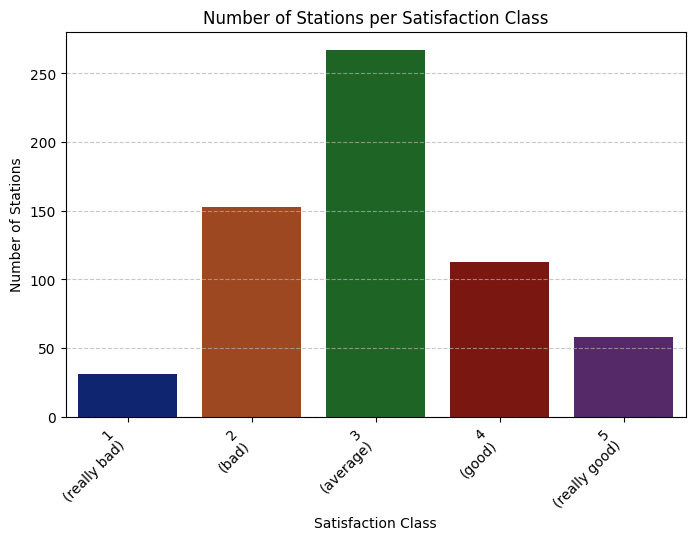

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

score_list = {
    1: 'really bad',
    2: 'bad',
    3: 'average',
    4: 'good',
    5: 'really good'
}

plt.figure(figsize=(8,5))
sns.countplot(data=satisfaction_df, x='Satisfaction Class', order=score_list.keys(), palette='dark', stat='count')

plt.title('Number of Stations per Satisfaction Class')
plt.xlabel('Satisfaction Class')
plt.ylabel('Number of Stations')



labels = [f'{key}\n({value})' for key, value in score_list.items()]

plt.xticks(ticks=range(len(score_list)), labels=labels, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


In [54]:
satisfaction_df['Satisfaction Class'].value_counts()

Satisfaction Class
3    267
2    153
4    113
5     58
1     31
Name: count, dtype: int64

In [56]:
# read in all the data
facilities = pd.read_csv('./Data/facilities.csv')
incidents = pd.read_csv('./Data/incidents.csv')
stations = pd.read_csv('./Data/stations.csv')
stops = pd.read_csv('./Data/stops.csv')
subscriptions = pd.read_csv('./Data/subscriptions.csv')
tickets = pd.read_csv('./Data/tickets.csv')
travelers = pd.read_csv('./Data/travelers.csv', sep=';')

In [64]:
# import all the trips files and store them together in a single dataframe
trips_folder = './Data/Trips/'

for idx, trips_day in enumerate(os.listdir(trips_folder)):
    # get full directory
    dir = trips_folder + trips_day

    # read csv
    df = pd.read_csv(dir, sep=';')

    # add dataframes together
    if idx == 0:
        trips_df = df
    else:
        trips_df = pd.concat([trips_df, df])

# show
trips_df

,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:28:04,06:28:04,06:25:00,06:25:00,184.0,184.0,IC 29: GENT-SINT-PIETERS -> GENK,SCHAARBEEK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1,2025-09-22,3605,IC 29,SNCB/NMBS,36N,06:34:58,06:34:58,06:32:00,06:32:00,178.0,178.0,IC 29: GENT-SINT-PIETERS -> GENK,KORTENBERG,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
2,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:41:40,06:43:28,06:39:00,06:42:00,160.0,88.0,IC 29: GENT-SINT-PIETERS -> GENK,LEUVEN,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
3,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:50:53,06:50:53,06:49:00,06:49:00,113.0,113.0,IC 29: GENT-SINT-PIETERS -> GENK,VERTRIJK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
4,2025-09-22,3605,IC 29,SNCB/NMBS,36,07:02:49,07:02:49,07:00:00,07:00:00,169.0,169.0,IC 29: GENT-SINT-PIETERS -> GENK,EZEMAAL,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40781,2025-09-28,9426,EURST,THI-FACT,0/2,10:30:37,10:30:37,10:31:00,10:31:00,-23.0,-23.0,EURST: KOLN HBF -> PARIS-NORD,BRUSSEL-CENTRAAL,0/2,2025-09-28,2025-09-28,2025-09-28,2025-09-28
40782,2025-09-28,9426,EURST,THI-FACT,0/2,10:31:35,10:31:35,10:33:00,10:33:00,-85.0,-85.0,EURST: KOLN HBF -> PARIS-NORD,BRUSSEL-KAPELLEKERK,0/2,2025-09-28,2025-09-28,2025-09-28,2025-09-28
40783,2025-09-28,9426,EURST,THI-FACT,1,11:00:41,11:00:41,10:52:00,10:52:00,521.0,521.0,EURST: KOLN HBF -> PARIS-NORD,HALLE,1,2025-09-28,2025-09-28,2025-09-28,2025-09-28
40784,2025-09-28,9887,TGV,SNCB/NMBS,NaN,13:12:47,NaN,11:03:00,NaN,7788.0,NaN,TGV: MARSEILLE-SAINT-CHARLES -> BRUSSEL-ZUID,BRUSSEL-ZUID,96N,2025-09-28,NaN,2025-09-28,NaN


In [71]:
subset_df = trips_df[trips_df['Actual arrival time']==trips_df['Actual departure time']]
subset_df = trips_df[trips_df['Planned arrival time']==trips_df['Planned departure time']]

subset_df



,Date of departure,Train number,Relation,Railway operator,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place,Arrival line,Planned arrival date,Planned departure date,Actual arrival date,Actual departure date
0,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:28:04,06:28:04,06:25:00,06:25:00,184.0,184.0,IC 29: GENT-SINT-PIETERS -> GENK,SCHAARBEEK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
1,2025-09-22,3605,IC 29,SNCB/NMBS,36N,06:34:58,06:34:58,06:32:00,06:32:00,178.0,178.0,IC 29: GENT-SINT-PIETERS -> GENK,KORTENBERG,36N,2025-09-22,2025-09-22,2025-09-22,2025-09-22
3,2025-09-22,3605,IC 29,SNCB/NMBS,36,06:50:53,06:50:53,06:49:00,06:49:00,113.0,113.0,IC 29: GENT-SINT-PIETERS -> GENK,VERTRIJK,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
4,2025-09-22,3605,IC 29,SNCB/NMBS,36,07:02:49,07:02:49,07:00:00,07:00:00,169.0,169.0,IC 29: GENT-SINT-PIETERS -> GENK,EZEMAAL,36,2025-09-22,2025-09-22,2025-09-22,2025-09-22
13,2025-09-22,2439,IC 18,SNCB/NMBS,125,18:08:58,18:08:58,18:07:00,18:07:00,118.0,118.0,IC 18: LIEGE-SAINT-LAMBERT -> BRUSSEL-ZUID,HAUTE-FLONE,125,2025-09-22,2025-09-22,2025-09-22,2025-09-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40779,2025-09-28,9426,EURST,THI-FACT,36N,10:19:37,10:19:37,10:21:00,10:21:00,-83.0,-83.0,EURST: KOLN HBF -> PARIS-NORD,NOSSEGEM,36N,2025-09-28,2025-09-28,2025-09-28,2025-09-28
40780,2025-09-28,9426,EURST,THI-FACT,0/2,10:27:48,10:27:48,10:28:00,10:28:00,-12.0,-12.0,EURST: KOLN HBF -> PARIS-NORD,BRUSSEL-NOORD,36N,2025-09-28,2025-09-28,2025-09-28,2025-09-28
40781,2025-09-28,9426,EURST,THI-FACT,0/2,10:30:37,10:30:37,10:31:00,10:31:00,-23.0,-23.0,EURST: KOLN HBF -> PARIS-NORD,BRUSSEL-CENTRAAL,0/2,2025-09-28,2025-09-28,2025-09-28,2025-09-28
40782,2025-09-28,9426,EURST,THI-FACT,0/2,10:31:35,10:31:35,10:33:00,10:33:00,-85.0,-85.0,EURST: KOLN HBF -> PARIS-NORD,BRUSSEL-KAPELLEKERK,0/2,2025-09-28,2025-09-28,2025-09-28,2025-09-28
